# Spam Url Analysis With Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [2]:
url = pd.read_csv('../Spam-Email-and-Url-Detection-Using-Machine-Learning/data-set/url_spam_classification.csv') # data set read

In [3]:
url

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
148298,"https://cdn.substack.com/image/fetch/f_auto,q_...",True
148299,https://numlock.substack.com/subscribe,True
148300,https://docs.google.com/forms/d/e/1FAIpQLSfDLO...,True
148301,https://bookclub.substack.com/,True


In [4]:
url.shape

(148303, 2)

In [5]:
url.describe()

,url,is_spam
count,148303,148303
unique,87581,2
top,https://www.bloomberg.com/tosv2.html,False
freq,1086,101021


In [6]:
url.groupby(url['is_spam']).size()

is_spam
False    101021
True      47282
dtype: int64

We have a total of 148.303 data. There are 101.021 safe and 47.282 spam.

In [7]:
url['is_spam'] = url.is_spam.apply(str) # Convert boolean column to string column

In [8]:
url['is_spam'] = url['is_spam'].apply(lambda x : 1 if x == "True" in x else 0)

In [9]:
url

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
...,...,...
148298,"https://cdn.substack.com/image/fetch/f_auto,q_...",1
148299,https://numlock.substack.com/subscribe,1
148300,https://docs.google.com/forms/d/e/1FAIpQLSfDLO...,1
148301,https://bookclub.substack.com/,1


In [10]:
urls = url.iloc[:,0]

In [11]:
urls.head()

0    https://briefingday.us8.list-manage.com/unsubs...
1                               https://www.hvper.com/
2                   https://briefingday.com/m/v4n3i4f3
3     https://briefingday.com/n/20200618/m#commentform
4                          https://briefingday.com/fan
Name: url, dtype: object

In [12]:
ifSpam = url.iloc[:,1]

In [13]:
ifSpam.head()

0    1
1    1
2    1
3    0
4    1
Name: is_spam, dtype: int64

With CountVectorizer, text is analyzed and word counts are made and these are converted into vectors.

In this analysis, we will use CountVectorizer, but first, since the url structure is not like normal text, we will convert the urls into a format that CountVectorizer can process with a method called tokenizer.

### Tokenizer

In [14]:
def extractUrl(data):
    url = str(data)
    extractSlash = url.split('/')
    result = []
    
    for i in extractSlash:
        extractDash = str(i).split('-')
        dotExtract = []
        
        for j in range(0,len(extractDash)):
            extractDot = str(extractDash[j]).split('.')
            dotExtract += extractDot
            
        result += extractDash + dotExtract
    result = list(set(result))

    return result


We have created the function that will perform the Tokenizer, the work of this function is as in the example below:

In [15]:
example = "http://www.emrahyldrm-1234.net"
a = extractUrl(example)
print(a)

['', 'net', 'emrahyldrm', 'http:', 'www.emrahyldrm', 'www', '1234.net', '1234']


We will use 75% of our dataset for training and 25% for testing : 

In [16]:
urls_train, urls_test, ifSpam_train, ifSpam_test = train_test_split(urls, ifSpam, test_size=0.25)

In [17]:
cv = CountVectorizer(tokenizer=extractUrl) # We defined the tokenizer in CountVectorizer

In [18]:
features = cv.fit_transform(urls_train)

In [19]:
features_test = cv.transform(urls_test)

# Learning and Predicts 

In [20]:
dtModel = tree.DecisionTreeClassifier() 

In [21]:
dtModel.fit(features, ifSpam_train)

DecisionTreeClassifier()

In [22]:
dtPredict = dtModel.predict(features_test)

In [23]:
lsvcModel = LinearSVC()

In [24]:
lsvcModel.fit(features, ifSpam_train)

LinearSVC()

In [25]:
lsvcPredict = lsvcModel.predict(features_test)

In [26]:
sgdcModel = SGDClassifier()

In [27]:
sgdcModel.fit(features, ifSpam_train) 

SGDClassifier()

In [28]:
sgdcPredict = sgdcModel.predict(features_test)

In [29]:
nbModel = MultinomialNB()

In [30]:
nbModel.fit(features, ifSpam_train)

MultinomialNB()

In [31]:
nbPredict = nbModel.predict(features_test)

# Visualization

In [32]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [33]:
def visualization(model):
    predict = model.predict(features_test)
    plot_confusion_matrix(model,features_test,ifSpam_test)
    plot_precision_recall_curve(model,features_test,ifSpam_test)
    plot_roc_curve(model,features_test,ifSpam_test)

# Results

### Decision Tree

In [34]:
print("Number of mislabeled out of a total of %d test entries: %d" % (urls_test.shape[0], 
                                                                      (ifSpam_test != dtPredict).sum()))

Number of mislabeled out of a total of 37076 test entries: 444


In [35]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')

In [36]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 98.80245981227749 with Decision Tree


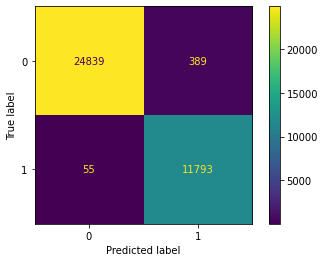

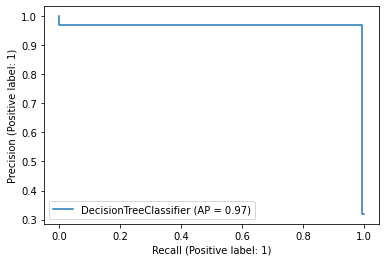

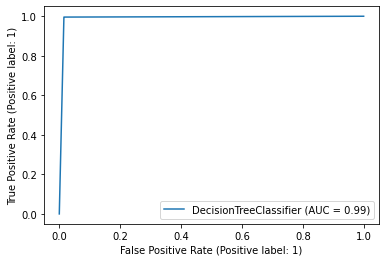

In [37]:
visualization(dtModel)

### Linear Support Vector

In [38]:
print("Number of mislabeled out of a total of %d test entries: %d" %  (urls_test.shape[0], 
                                                                       (ifSpam_test != lsvcPredict).sum()))

Number of mislabeled out of a total of 37076 test entries: 547


In [39]:
successRate = 100.0 * f1_score(ifSpam_test, lsvcPredict, average='micro')

In [40]:
print("The Success Rate was calculated as % : " + str(successRate) + " with LinearSVC")

The Success Rate was calculated as % : 98.52465206602655 with LinearSVC


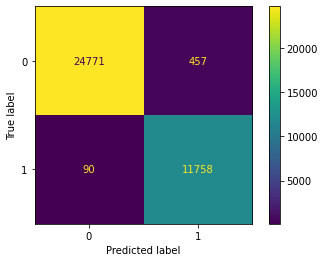

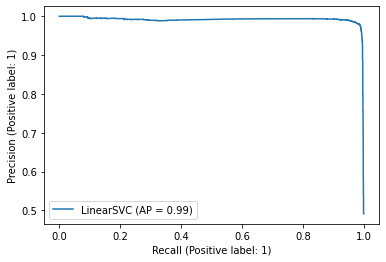

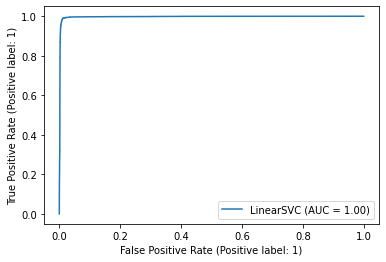

In [41]:
visualization(lsvcModel)

### Stochastic Gradient Descent

In [42]:
print("Number of mislabeled out of a total of %d test entries: %d" %  (urls_test.shape[0], 
                                                                       (ifSpam_test != sgdcPredict).sum()))

Number of mislabeled out of a total of 37076 test entries: 1752


In [43]:
successRate = 100.0 * f1_score(ifSpam_test, sgdcPredict, average='micro')

In [44]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Stochastic Gradient Descent")

The Success Rate was calculated as % : 95.27457115114899 with Stochastic Gradient Descent


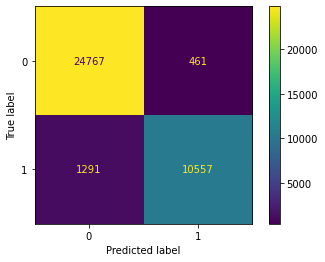

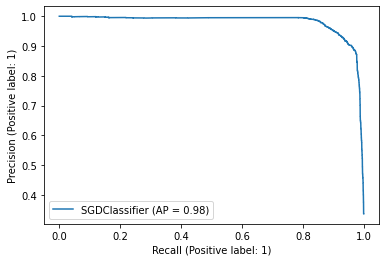

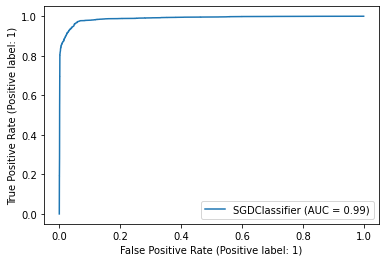

In [45]:
visualization(sgdcModel)

### Multinomial Naive Bayes

In [46]:
print("Number of mislabeled out of a total of %d test entries: %d" % (urls_test.shape[0], 
                                                                      (ifSpam_test != nbPredict).sum()))

Number of mislabeled out of a total of 37076 test entries: 3299


In [47]:
successRate = 100.0 * f1_score(ifSpam_test, nbPredict, average='micro')

In [48]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Multinomial Naive Bayes")

The Success Rate was calculated as % : 91.10206063221491 with Multinomial Naive Bayes


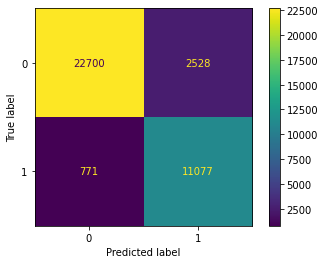

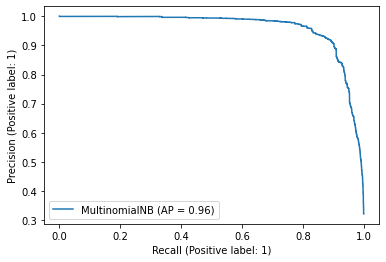

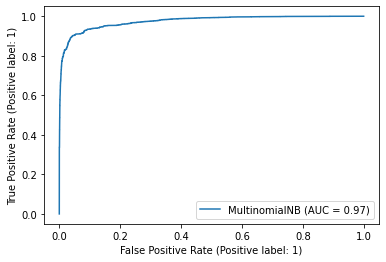

In [49]:
visualization(nbModel)